# Data Exploration

# Data First Look
Following description are from the kaggle link https://www.kaggle.com/datasets/bhaveshmisra/heart-disease-indicators/ from where the data was obtained. 

| **Column Name** | **Description** | **Markers** |
|:---:|:---:|:---:|
| HeartDiseaseorAttack: | Indicates whether the individual has had a heart disease or heart attack | (binary: 0 = No, 1 = Yes) |
| HighBP | High blood pressure status | (binary: 0 = No, 1 = Yes) |
| HighChol | High cholesterol status | (binary: 0 = No, 1 = Yes) |
| CholCheck | Frequency of cholesterol check | categorical |
| BMI | Body Mass Index | continuous |
| Smoker | Smoking status | (binary: 0 = No, 1 = Yes) |
| Stroke | History of stroke | (binary: 0 = No, 1 = Yes) |
| Diabetes | Diabetes status | (binary: 0 = No, 1 = Yes) |
| PhysActivity | Level of physical activity | categorical |
| Fruits | Frequency of fruit consumption | categorical |
| Veggies | Frequency of vegetable consumption | categorical |
| HvyAlcoholConsump | Heavy alcohol consumption status | (binary: 0 = No, 1 = Yes) |
| AnyHealthcare | Access to any healthcare | (binary: 0 = No, 1 = Yes) |
| NoDocbcCost | No doctor because of cost | (binary: 0 = No, 1 = Yes) |
| GenHlth | General health assessment | categorical |
| MentHlth | Mental health assessment | categorical |
| PhysHlth | Level of physical activity | categorical |
| DiffWalk | Difficulty walking status | binary: 0 = No, 1 = Yes |
| Sex | Gender of the individual | binary: 0 = Female, 1 = Male |
| Age | Age of the individual | continuous |
| Education | Educational level | categorical |
| Income | Income level | categorical |

In [1]:
import pandas as pd 

df = pd.read_csv('data/heart_disease_health_indicators.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [2]:
## Check DF for Missing, duplicates, and Invalid Values
def rework_dataframe(data):
    num_dups = data.duplicated().sum()
    num_na = data.isna().sum()
    if(num_dups > 0):
        print('Duplicates are detected: {}'.format(num_dups))
    if(num_na > 0):
        print('Missing Values detected: {}'.format(num_na))
    

In [3]:
#rework_dataframe(df)
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

In [4]:
sorted_corr = sorted(list(zip(df.corrwith(df.HeartDiseaseorAttack).index, df.corrwith(df.HeartDiseaseorAttack).values)), key= lambda x: x[1], reverse= True)
sorted_corr

[('HeartDiseaseorAttack', 0.9999999999999998),
 ('GenHlth', 0.2583800622649124),
 ('Age', 0.22158835697534263),
 ('DiffWalk', 0.2126999481939687),
 ('HighBP', 0.20934690842623432),
 ('Stroke', 0.20297847349674555),
 ('PhysHlth', 0.18175010145835535),
 ('HighChol', 0.18074387371463468),
 ('Diabetes', 0.18021994385870915),
 ('Smoker', 0.11445077570868405),
 ('Sex', 0.08608182466801063),
 ('MentHlth', 0.06463166419525669),
 ('BMI', 0.052926666263651063),
 ('CholCheck', 0.04420165755038282),
 ('NoDocbcCost', 0.030993550184341512),
 ('AnyHealthcare', 0.018726220731768776),
 ('Fruits', -0.01982175181650511),
 ('HvyAlcoholConsump', -0.028982837059524005),
 ('Veggies', -0.03911745901063158),
 ('PhysActivity', -0.08728353166268642),
 ('Education', -0.09955612300239525),
 ('Income', -0.14096600406335408)]

## First Look
1. Duplicate are acceptable due to the lack of indivudal tracking of rows. 
2. All columns have the data type of integer. This means that the categorial columns are binned in integer rather than string categories. 
3. **253,661** different entries in the dataset
4. General Health and Age are the top two correlating indictors for heart disease. 

Surprisingly, the ones I believe to be more impactful was lower in the list. It might be intereseting to see the correlation from one another instead of the targeted value. 
Since age and general health are such broad terms, it could be umbrela to other issues. For example, assuming that a higher general health number means a worst assessment, a higher blood pressure and cholerstol level would be expected. 

This presents a problem that we are assuming metrics and since the dataset didn't come with explanation to the columns, it would be wrong to use them in an sense of factual useage. Therefore, I will be removing those with less meaningful metric. 
General Health and Mental Health are two of the uncertain metric that doesn't state whther a higher number is better or worse.  

In [5]:
df.corrwith(df.GenHlth)

HeartDiseaseorAttack    0.258380
HighBP                  0.300503
HighChol                0.208409
CholCheck               0.046589
BMI                     0.239211
Smoker                  0.163159
Stroke                  0.177933
Diabetes                0.302585
PhysActivity           -0.266180
Fruits                 -0.103861
Veggies                -0.123040
HvyAlcoholConsump      -0.036722
AnyHealthcare          -0.040822
NoDocbcCost             0.166407
GenHlth                 1.000000
MentHlth                0.301661
PhysHlth                0.524395
DiffWalk                0.456926
Sex                    -0.006091
Age                     0.152424
Education              -0.284932
Income                 -0.370051
dtype: float64

In [6]:
import matplotlib.pyplot as plt
for column in df.columns[1:]:
    temp_df = df[[column, 'HeartDiseaseorAttack']]
    

In [7]:
cont_col = ['BMI', 'Age']
cat_col = ['CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'GenHlth','MentHlth', 'PhysHlth', 'Education', 'Income']
bin_col = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
target = 'HeartDiseaseorAttack'

cat_df = df[cat_col]
bin_df = df[bin_col]
cont_df = df[cont_col]

In [8]:
for col in cat_df.columns:
    display(cat_df[col].value_counts())

1    244191
0      9470
Name: CholCheck, dtype: int64

1    191914
0     61747
Name: PhysActivity, dtype: int64

1    160888
0     92773
Name: Fruits, dtype: int64

1    205830
0     47831
Name: Veggies, dtype: int64

2    89081
3    75638
1    45295
4    31567
5    12080
Name: GenHlth, dtype: int64

0     175664
2      13054
30     12087
5       9030
1       8538
3       7381
10      6373
15      5504
4       3789
20      3364
7       3100
25      1188
14      1166
6        988
8        639
12       398
28       327
21       227
29       158
18        97
9         91
16        88
27        79
22        63
17        54
26        45
11        41
13        41
23        38
24        33
19        16
Name: MentHlth, dtype: int64

0     160041
30     19398
2      14763
1      11388
3       8494
5       7620
10      5595
15      4915
4       4541
7       4538
20      3273
14      2587
25      1336
6       1330
8        809
21       663
12       578
28       522
29       215
9        179
18       152
16       112
27        99
17        96
24        72
22        70
26        69
13        68
11        60
23        56
19        22
Name: PhysHlth, dtype: int64

6    107316
5     69907
4     62748
3      9476
2      4040
1       174
Name: Education, dtype: int64

8    90384
7    43217
6    36468
5    25882
4    20131
3    15994
2    11777
1     9808
Name: Income, dtype: int64

In [9]:
for col in cont_df.columns:
    display(cont_df[col].value_counts())

27    24604
26    20562
24    19550
25    17144
28    16543
      ...  
78        1
85        1
86        1
90        1
91        1
Name: BMI, Length: 84, dtype: int64

9     33243
10    32193
8     30831
7     26313
11    23531
6     19815
13    17362
5     16153
12    15979
4     13823
3     11121
2      7597
1      5700
Name: Age, dtype: int64

In [10]:
for col in bin_df.columns:
    display(bin_df[col].value_counts())

0    144843
1    108818
Name: HighBP, dtype: int64

0    146080
1    107581
Name: HighChol, dtype: int64

0    141242
1    112419
Name: Smoker, dtype: int64

0    243370
1     10291
Name: Stroke, dtype: int64

0    213690
2     35342
1      4629
Name: Diabetes, dtype: int64

0    239405
1     14256
Name: HvyAlcoholConsump, dtype: int64

1    241244
0     12417
Name: AnyHealthcare, dtype: int64

0    232312
1     21349
Name: NoDocbcCost, dtype: int64

0    210990
1     42671
Name: DiffWalk, dtype: int64

0    141962
1    111699
Name: Sex, dtype: int64

## Adjustments
It appears that some of the columns were not labeled correctly and should be changed to the correct type. Some of the mistakes made sense such as Diebietes have 0, 1, and 2 which I infer as 0 (not diebetix, type 1, and type 2. This however, requeirs me to assume which would be bad to consider currently until I have more information to actually use for this project. 

There is also some ambituos infomation regarding some of the categroatcal having only binary infomation. Following the author original trend, we can assume taht 0 is the lack of and 1 being hte pressents of. Since there isn't a metric of what to compare this to, I will assume that the patient meet the recommended amount of fruit, vegetables and phyiscal activity in the United States. 

In [11]:
cont_col = ['BMI', 'Age']
cat_col = ['Education', 'Income', 'Diabetes']
bin_col = ['CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'HighBP', 'HighChol', 'Smoker', 'Stroke', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
on_hold = ['GenHlth','MentHlth', 'PhysHlth']
target = 'HeartDiseaseorAttack'

cat_df = df[cat_col]
bin_df = df[bin_col]
cont_df = df[cont_col]

In [12]:
print('Binary Columns')
for col in bin_df.columns:
    display(bin_df[col].value_counts())
print('\n') 
print('Continuous Columns')    
for col in cont_df.columns:
    display(cont_df[col].value_counts())
print('\n') 
print('Categorical Columns')
for col in cat_df.columns:
    display(cat_df[col].value_counts())

Binary Columns


1    244191
0      9470
Name: CholCheck, dtype: int64

1    191914
0     61747
Name: PhysActivity, dtype: int64

1    160888
0     92773
Name: Fruits, dtype: int64

1    205830
0     47831
Name: Veggies, dtype: int64

0    144843
1    108818
Name: HighBP, dtype: int64

0    146080
1    107581
Name: HighChol, dtype: int64

0    141242
1    112419
Name: Smoker, dtype: int64

0    243370
1     10291
Name: Stroke, dtype: int64

0    239405
1     14256
Name: HvyAlcoholConsump, dtype: int64

1    241244
0     12417
Name: AnyHealthcare, dtype: int64

0    232312
1     21349
Name: NoDocbcCost, dtype: int64

0    210990
1     42671
Name: DiffWalk, dtype: int64

0    141962
1    111699
Name: Sex, dtype: int64



Continuous Columns


27    24604
26    20562
24    19550
25    17144
28    16543
      ...  
78        1
85        1
86        1
90        1
91        1
Name: BMI, Length: 84, dtype: int64

9     33243
10    32193
8     30831
7     26313
11    23531
6     19815
13    17362
5     16153
12    15979
4     13823
3     11121
2      7597
1      5700
Name: Age, dtype: int64



Categorical Columns


6    107316
5     69907
4     62748
3      9476
2      4040
1       174
Name: Education, dtype: int64

8    90384
7    43217
6    36468
5    25882
4    20131
3    15994
2    11777
1     9808
Name: Income, dtype: int64

0    213690
2     35342
1      4629
Name: Diabetes, dtype: int64

## Class Balance
Looking at the target distribution helps us understand whether or not the data is balanced toward one side or the other. 
We can see that majority of the patients does not have any heart related issues which can be a problem when modeling known as a class imbalance. 
Some solutions would be to under or over sample the data to have a more distribution with the data available. 

0    0.905827
1    0.094173
Name: HeartDiseaseorAttack, dtype: float64

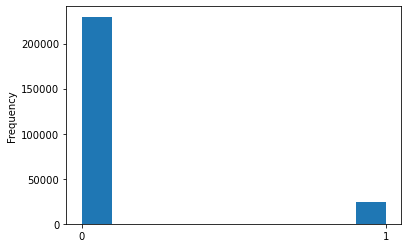

In [19]:
df.HeartDiseaseorAttack.plot(kind = 'hist', xticks = [0,1])
df.HeartDiseaseorAttack.value_counts(normalize= True)